In [1]:
import numpy as np
import numpy.random as rand
import scipy.fftpack as fft
import six
import cv2 as cv
import seaborn as sns
import pywt as wt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot

In [2]:
%matplotlib inline
jtplot.reset()
# plt.switch_backend('Agg')
sns.set()
sns.set_context("notebook")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 100

In [3]:
traindir = "D:/Kenneth/Documents/VIP/Datasets/dr2imagenet/TEST"

# Chapter 2

## Compressive sensing

### Sparsity

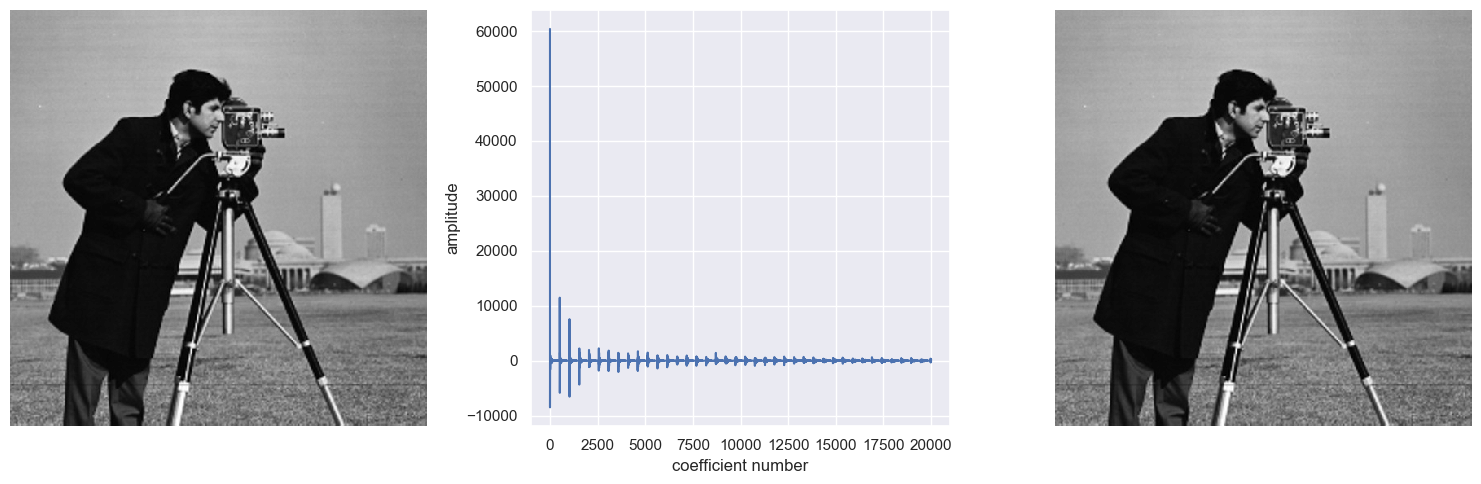

In [16]:
lena = cv.imread(f'{traindir}/cameraman.png', 0)
# fa = fft.fft2(lena)
fa = fft.dct(fft.dct(lena, norm='ortho', axis=0), norm='ortho', axis=1)
fas = fa.copy()
fas[25000:] = 0
sparse = fft.idct(fft.idct(fas, norm='ortho', axis=1), norm='ortho', axis=0)

fig, ax = plt.subplots(1, 3, figsize=(5*3, 5))

ax[0].imshow(lena, 'gray')
ax[0].axis('off')

ax[1].plot(fa.ravel().real[:20000])
ax[1].set_xlabel('coefficient number')
ax[1].set_ylabel('amplitude')

ax[2].imshow(sparse, 'gray')
ax[2].axis('off')

plt.tight_layout()
# plt.savefig(
#     'C2-sparsity.png',
#     dpi=300,
#     bbox_inches='tight'
# )
plt.show()